## Filtering the data

In [ ]:
import json

user_ids = [
    "d98305d0-5b13-4b5a-8a7f-d12e5031949b",
    "d6356511-23b3-494c-bf8c-f0c304925598",
    "88fbbe41-7be7-44b7-9b03-f4bb27252187",
    "2ae9ad69-1a23-4e6d-b224-ce3cf3afafb3",
    "0a926568-0bb3-4245-b5e9-2899220226d1",
    "fe56a6f0-a6e4-4843-9f36-fd512a562450",
    "813b0aa1-5b73-4389-8fac-fe44b5b1a786",
    "94823a02-a494-4a27-8ee7-a2d8a6f62194",
    "dc6984ff-ee5e-4a1a-8582-9f527adaa084",
    "e5135858-c677-44f1-aa5a-53d5cdf2c644",
    "080356e8-a202-4fb4-b186-692241c09fc2",
    "1487ad35-4217-46ba-b6c1-6cc5f4d92122",
    "6d67765a-6c20-4084-a00c-fc5a5c3ddfdf",
    "c43a1168-956a-4df9-97b0-f87989534032",
    "53e67260-656a-454e-b282-9de374a7b9fd",
    "2c11b9f7-b2e4-461d-a18f-849464948ed6",
    "f50cc99e-9e98-47be-87b6-33065455e87a",
    "ca742a4f-d721-427f-a650-861ce66148f5",
    "310f2840-430d-4498-b874-df63c8e75b17",
    "8cb5203b-13b6-4ed1-a05c-36f5dd2672b0",
    "b2d4c242-c392-4efc-9e6f-b4f46a00395a",
    "15a7700b-5f40-4b2c-8c30-83ca9bdb70e2",
    "8055b04a-0060-4579-99e4-dc9d0b6dc1b8",
    "5f310513-2d9e-4f2e-ad72-b84b00b6fcdb",
    "486bfb1e-cce0-4dea-91a4-de1af42047f8",
    "834a46eb-ec28-4e87-a519-4656499e0429",
    "90584279-2b52-49cd-969c-a4f0a52e14e4",
    "f267760d-1853-4892-b151-e21f148623b7",
    "05979a80-169a-4b67-8bc0-f95098063a95",
    "3fb20d76-25e6-4593-bb43-93b3ce0f3bc5"
]

with open("firestore-export.json", "r", encoding="utf-8") as f:
    data = json.load(f)

filtered_sessions = {}
incomplete_ids = []

for uid in user_ids:
    session = data["sessions"].get(uid)
    if session:
        st = session.get("standardTime", [])
        mt = session.get("metaphorTime", [])
        if len(st) == 2 and len(mt) == 2:
            filtered_sessions[uid] = session
        else:
            incomplete_ids.append(uid)
    else:
        incomplete_ids.append(uid)

filtered_data = {"sessions": filtered_sessions}
with open("filtered-sessions-proper.json", "w", encoding="utf-8") as f:
    json.dump(filtered_data, f, indent=2)

print("User IDs who did not complete both tasks twice:")
for uid in incomplete_ids:
    print(uid)

len(filtered_sessions)

User IDs who did not complete both tasks twice:
f50cc99e-9e98-47be-87b6-33065455e87a
b2d4c242-c392-4efc-9e6f-b4f46a00395a
834a46eb-ec28-4e87-a519-4656499e0429
f267760d-1853-4892-b151-e21f148623b7


26

## Homogeneity of Variance and Normality test for task 1 and 2

In [ ]:
import json
import numpy as np
from scipy.stats import shapiro, levene

with open("filtered-sessions-proper.json", "r") as file:
    data = json.load(file)['sessions']

standard_task1, standard_task2 = [], []
metaphor_task1, metaphor_task2 = [], []

for session in data.values():
    if "standardTime" in session and "metaphorTime" in session:
        s = session["standardTime"]
        m = session["metaphorTime"]

        # Each should have length 2
        standard_task1.append(s[0])
        standard_task2.append(s[1])
        metaphor_task1.append(m[0])
        metaphor_task2.append(m[1])

print("Counts:")
print(f"Standard Interface: Task 1: {len(standard_task1)}, Task 2: {len(standard_task2)}")
print(f"Metaphor Interface: Task 1: {len(metaphor_task1)}, Task 2: {len(metaphor_task2)}\n")

print("Normality Tests (Shapiro-Wilk):")
for label, values in [
    ("Standard Task 1", standard_task1),
    ("Standard Task 2", standard_task2),
    ("Metaphor Task 1", metaphor_task1),
    ("Metaphor Task 2", metaphor_task2)
]:
    stat, p = shapiro(values)
    print(f"{label}: p={p:.4f} ({'normal' if p>0.05 else 'not normal'})")

print("\nHomogeneity of Variance (Levene's test):")
for t, (s, m) in enumerate([(standard_task1, metaphor_task1), (standard_task2, metaphor_task2)], 1):
    stat, p = levene(s, m)
    print(f"Task {t}: p={p:.4f} ({'equal variance' if p>0.05 else 'not equal variance'})")

print("\nMeans (ms):")
print(f"Standard Task 1: {np.mean(standard_task1):.2f}, Task 2: {np.mean(standard_task2):.2f}")
print(f"Metaphor Task 1: {np.mean(metaphor_task1):.2f}, Task 2: {np.mean(metaphor_task2):.2f}")

Counts:
Standard Interface: Task 1: 26, Task 2: 26
Metaphor Interface: Task 1: 26, Task 2: 26

Normality Tests (Shapiro-Wilk):
Standard Task 1: p=0.0003 (not normal)
Standard Task 2: p=0.0031 (not normal)
Metaphor Task 1: p=0.0008 (not normal)
Metaphor Task 2: p=0.0017 (not normal)

Homogeneity of Variance (Levene's test):
Task 1: p=0.5700 (equal variance)
Task 2: p=0.6387 (equal variance)

Means (ms):
Standard Task 1: 84587.08, Task 2: 37045.73
Metaphor Task 1: 67111.81, Task 2: 38749.88


## QQ-plot and Histogram for task 1 and 2

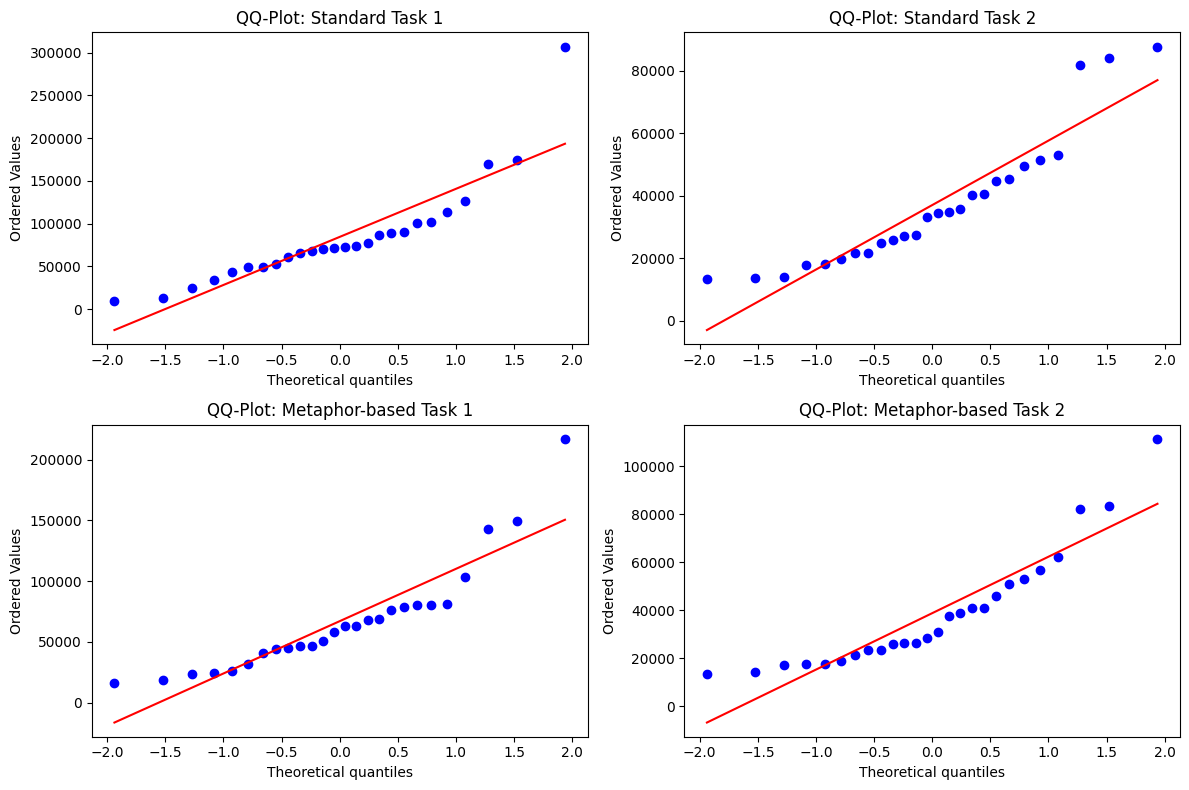

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

data_lists = [
    (standard_task1, "Standard Task 1"),
    (standard_task2, "Standard Task 2"),
    (metaphor_task1, "Metaphor-based Task 1"),
    (metaphor_task2, "Metaphor-based Task 2"),
]

plt.figure(figsize=(12, 8))
for i, (data_list, label) in enumerate(data_lists, 1):
    plt.subplot(2, 2, i)
    stats.probplot(data_list, dist="norm", plot=plt)
    plt.title(f"QQ-Plot: {label}")

plt.tight_layout()
plt.show()

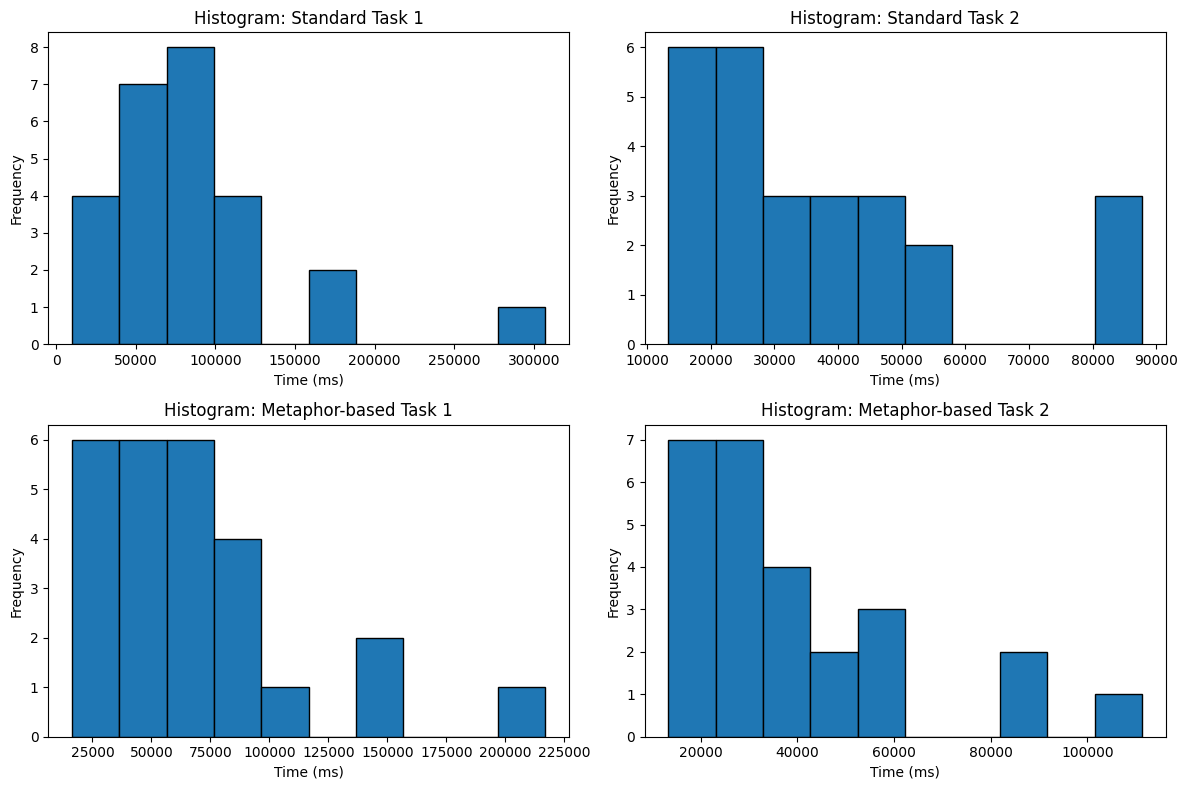

In [ ]:
# Plot Histograms
plt.figure(figsize=(12, 8))
for i, (data_list, label) in enumerate(data_lists, 1):
    plt.subplot(2, 2, i)
    plt.hist(data_list, bins=10, edgecolor="k")
    plt.title(f"Histogram: {label}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Box plot for task 1 and task 2

<ipython-input-12-738868415>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_data, labels=labels) #showmeans=True)


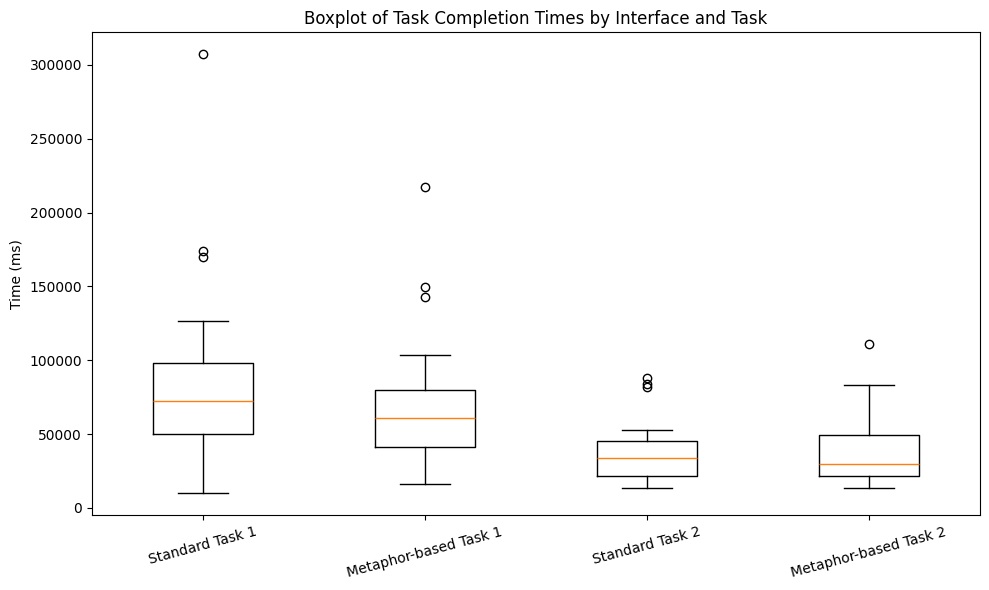

In [ ]:
all_data = [standard_task1, metaphor_task1, standard_task2, metaphor_task2]
labels = ["Standard Task 1", "Metaphor-based Task 1", "Standard Task 2", "Metaphor-based Task 2"]

plt.figure(figsize=(10, 6))
plt.boxplot(all_data, labels=labels) #showmeans=True)
plt.ylabel("Time (ms)")
plt.title("Boxplot of Task Completion Times by Interface and Task")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Wilcoxon signed-rank test for task 1 and task 2 (one tail)

In [ ]:
from scipy.stats import wilcoxon

# Wilcoxon signed-rank test for Task 1, testing if metaphor < standard
wilcoxon_task1_less = wilcoxon(metaphor_task1, standard_task1, alternative="less")
# Wilcoxon signed-rank test for Task 2, testing if metaphor < standard
wilcoxon_task2_less = wilcoxon(metaphor_task2, standard_task2, alternative="less")

wilcoxon_task1_less.statistic, wilcoxon_task1_less.pvalue, wilcoxon_task2_less.statistic, wilcoxon_task2_less.pvalue

(np.float64(124.0),
 np.float64(0.09936809539794922),
 np.float64(168.0),
 np.float64(0.4306280016899109))

Task 1:

* Test statistic = 124.0

* p-value = 0.0994

Task 2:

* Test statistic = 168.0

* p-value = 0.4306

Interpretation:

* For both tasks, p > 0.05

So, we do not have statistically significant evidence that the metaphor-based interface is faster than the standard interface.